In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive, files # google colab specific
import requests
import pandas as pd
import os
import warnings
import sys
import matplotlib.pyplot as plt
import json
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow import keras
from keras import layers
import math
from sklearn.metrics import mean_squared_error
from datetime import datetime
import datetime as dt
from pylab import rcParams

In [ ]:
# Read in all Fundamental Data and Store it in one big dataframe for easier use
#df1 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/FedFundsRate.csv')
#df2 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/Global Price Index of All Commodities.csv')
#df3 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/InflationRate 20y.csv')
#df4 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/All Employees Construction in Florida.csv')
#df5 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/Homeownership Rate.csv')
#df6 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/Housing Inventory Estimate Vacant Housing Units.csv')
#df7 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/MonthlySupplyHousesUSA.csv')
#df8 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/New Housing Units Completed Total Units.csv')
#df9 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/New Housing Units Under Construction Total Units.csv')
#df10 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/Rental Vacancy Rate.csv')
#df11 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/State Tax Collections Total Taxes for Florida.csv')
#df12 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/Total Shipments of New Manufactured Homes Total Homes.csv')
#df13 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/UnemploymentRate.csv')
#df14 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/ShillerIndex.csv')


In [ ]:
# Modify CSV files to fit each other
#filePath = "/content/drive/MyDrive/JPM/jphomevalue/data/TPXRSA.csv"
#df = pd.read_csv(filePath, header = 0)
#df['DATE'] = pd.to_datetime(df['DATE'])
#df = df.set_index('DATE')
#df.index = df.index.to_period("1M")
#df = df.resample('1M').interpolate()
#df = df.rename(columns={"TPXRSA": "ShillerIndex"})
#df

In [ ]:
# Download the new modified file 
#df.to_csv('RealEstateFundamentalData.csv')
#files.download('RealEstateFundamentalData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Join all datasets together
#df = df1.set_index('DATE').join(df2.set_index('DATE'), on='DATE').join(df3.set_index('DATE'), on='DATE').join(df4.set_index('DATE'), on='DATE').join(df5.set_index('DATE'), on='DATE').join(df6.set_index('DATE'), on='DATE').join(df7.set_index('DATE'), on='DATE').join(df8.set_index('DATE'), on='DATE').join(df9.set_index('DATE'), on='DATE').join(df10.set_index('DATE'), on='DATE').join(df11.set_index('DATE'), on='DATE').join(df12.set_index('DATE'), on='DATE').join(df13.set_index('DATE'), on='DATE').join(df14.set_index('DATE'), on='DATE')

In [3]:
# Read in the csv file that contains the time series data of the Shiller Index
# Create the dataframe

df = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/RealEstateFundamentalData2005-.csv')
df.head()

,DATE,FedRate,CommoditiesGlobalPrice,InflationRate,AllEmployeesConstructionFL,HomeownershipRate,VacantHousingInventory,MonthlyHouseSupply,NewCompletedHousing,NewUnderConstrHousing,RentalVacancyRate,Taxes,ManufacturedHomesShipments,UnemploymentRate,ShillerIndex
0,2004-07,1.26,80.425518,2.80,574.6,69.000000,15656.00000,4.5,1881,1247,10.100000,7983.000000,129,5.5,159.950268
1,2004-08,1.43,81.693371,2.84,578.2,69.066667,15557.66667,4.3,1911,1238,10.066667,8010.333333,127,5.4,162.578638
2,2004-09,1.61,82.961225,2.73,577.6,69.133333,15459.33333,4.1,1796,1247,10.033333,8037.666667,134,5.4,165.082920
3,2004-10,1.76,84.229079,2.72,590.4,69.200000,15361.00000,3.9,1839,1264,10.000000,8065.000000,136,5.5,167.959498
4,2004-11,1.93,85.862922,2.80,596.0,69.166667,15490.00000,4.3,1758,1268,10.033333,8509.666667,135,5.4,170.588157


In [4]:
# Select Features
features = list(df)[1:15]

# Extract dates (For vizualization purposes)
datelist_total = list(df['DATE'])
datelist_total = [dt.datetime.strptime(date, '%Y-%m').date() for date in datelist_total]
print('Available Data == {}'.format(df.shape))
print('All timestamps == {}'.format(len(datelist_total)))
print('Features: {}'.format(features))

Available Data == (208, 15)
All timestamps == 208
Features: ['FedRate', 'CommoditiesGlobalPrice', 'InflationRate', 'AllEmployeesConstructionFL', 'HomeownershipRate', 'VacantHousingInventory', 'MonthlyHouseSupply', 'NewCompletedHousing', 'NewUnderConstrHousing', 'RentalVacancyRate', 'Taxes', 'ManufacturedHomesShipments', 'UnemploymentRate', 'ShillerIndex']


In [5]:
# Data Pre-Processing (CSV to NUMPY array)

df = df[features].astype(str)
for i in features:
    for j in range(0, len(df)):
        df[i][j] = df[i][j].replace(',', '')

df = df.astype(float)

# Using multiple features (predictors)
training_set = df.to_numpy()

print('Shape of Data == {}.'.format(training_set.shape))
training_set



Shape of Data == (208, 14).


array([[1.26000000e+00, 8.04255179e+01, 2.80000000e+00, ...,
        1.29000000e+02, 5.50000000e+00, 1.59950268e+02],
       [1.43000000e+00, 8.16933715e+01, 2.84000000e+00, ...,
        1.27000000e+02, 5.40000000e+00, 1.62578638e+02],
       [1.61000000e+00, 8.29612250e+01, 2.73000000e+00, ...,
        1.34000000e+02, 5.40000000e+00, 1.65082920e+02],
       ...,
       [9.00000000e-02, 1.74254761e+02, 2.39000000e+00, ...,
        1.05000000e+02, 5.20000000e+00, 2.96829882e+02],
       [8.00000000e-02, 1.80987905e+02, 2.38000000e+00, ...,
        1.06000000e+02, 4.70000000e+00, 3.04124715e+02],
       [8.00000000e-02, 1.87721050e+02, 2.54000000e+00, ...,
        1.07000000e+02, 4.60000000e+00, 3.09713391e+02]])

In [ ]:
# Visualize the data for reference. 
plt.plot(df)

In [6]:
#### NORMALIZATION #####
# Normalize the data with the range 0 - 1
scaler = MinMaxScaler(feature_range=(0,1))

# Apply the scaler to the dataframe
#df = scaler.fit_transform(np.array(df).reshape(-1,1))
training_set_X = scaler.fit_transform(training_set)
std_data = scaler.fit_transform(training_set)
scaler_pred = MinMaxScaler(feature_range=(0,1))
training_set_Y = scaler_pred.fit_transform(training_set[:,13:14])
# Print df1 to check the change
#print(df1)

#### STANDARDIZATION ####

# Standardization for Training Set
#scaler2 = StandardScaler()
#training_set_X = scaler2.fit_transform(training_set)
#std_data = scaler2.fit_transform(training_set)
# Standardization for Predicted Values#
#scaler_pred = StandardScaler()
#training_set_Y = scaler_pred.fit_transform(training_set[:,13:14])


In [ ]:
# Verify that standardization has been applied correctly by checking that mean is 0 and std is 1.
new_sequence = training_set_X[:,13].flatten()
new_sequence = new_sequence[new_sequence != 0] #ignore 0s
new_mean = new_sequence.mean()
new_std = new_sequence.std()
print("New mean is:", new_mean)
print("new_std is:", new_std)

New mean is: 1.0248212535001446e-16
new_std is: 1.0


In [ ]:
#print(scaler2.inverse_transform(training_set_X))
#df.shape
#training_set_Y
training_set_Y


In [7]:
# Create matrix
def create_matrix(data_set):
    data_X, data_Y = [], []
    time_step = 17
    dataset = data_set

    for i in range(len(dataset)-time_step-1):
      k = dataset[i:(i + time_step), 0:df.shape[1] - 1]
      data_X.append(k)
      data_Y.append(dataset[i + time_step-1:i+time_step, 13])

    data_X, data_Y = np.array(data_X), np.array(data_Y)

    return data_X, data_Y

In [8]:
# Split the data in training, validation and test set. 
data_split = {'train': 0.7, 'valid': 0.15, 'test': 0.15}
data_partition = {
      'train': std_data[0:int(data_split['train']*std_data.shape[0])],
      'val': std_data[int(data_split['train']*std_data.shape[0]):int((1 - data_split['test'])*std_data.shape[0])],
      'test': std_data[int((1 - data_split['test'])*std_data.shape[0]):int(std_data.shape[0])]
}

train_data = data_partition['train']
val_data = data_partition['val']
test_data = data_partition['test']

x_train, y_train = create_matrix(train_data)
x_val, y_val = create_matrix(val_data)
x_test, y_test = create_matrix(test_data)

test_data.shape

(32, 14)

In [ ]:
training_set_Y

In [9]:
print('X Train set shape:', x_train.shape)
print('y Train set shape:', y_train.shape)

print('X Validation set shape:', x_val.shape)
print('y Validation set shape:', y_val.shape)

print('X Test set shape:', x_test.shape)
print('y Test set shape:', y_test.shape)

X Train set shape: (127, 17, 13)
y Train set shape: (127, 1)
X Validation set shape: (13, 17, 13)
y Validation set shape: (13, 1)
X Test set shape: (14, 17, 13)
y Test set shape: (14, 1)


In [23]:
# Hyperparameters
batch_size = 64
epochs = 500
learning_rate = 0.01

In [24]:
# LSTM MODEL ARCHITECTURE

model = keras.models.Sequential([
  keras.Input(shape=(17, 13)),
  # 4 LSTM Layers 
  keras.layers.LSTM(units=200, return_sequences=True),
  keras.layers.LSTM(units=200, return_sequences=True),
  keras.layers.LSTM(units=200, return_sequences=True),
  keras.layers.LSTM(units=200),
  keras.layers.Dropout(0.5),
  # Fully Connected Layer
  keras.layers.Dense(128),
  keras.layers.Dense(64),
  keras.layers.Dense(32),
  keras.layers.Dense(8, activation = 'relu'),
  keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 17, 200)           171200    
                                                                 
 lstm_13 (LSTM)              (None, 17, 200)           320800    
                                                                 
 lstm_14 (LSTM)              (None, 17, 200)           320800    
                                                                 
 lstm_15 (LSTM)              (None, 200)               320800    
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               25728     
                                                                 
 dense_14 (Dense)            (None, 64)               

In [25]:
# Loss and Optimizer Functions
mse = tf.keras.losses.MeanSquaredError()
rmse = tf.keras.metrics.RootMeanSquaredError()
model.compile(loss=mse, optimizer=keras.optimizers.SGD(learning_rate=learning_rate), metrics=[rmse])

In [26]:
# Callbacks.

callbacks = [EarlyStopping(monitor='val_loss', patience=50, verbose=1), 
            ModelCheckpoint(filepath='/content/sample_data/lstm-model-fundamental-17-14-16.h5', verbose=1, monitor='val_loss', save_best_only=True, save_weights_only=False)]

# Train the model
history = model.fit(x=x_train, y=y_train, validation_data =(x_val, y_val), epochs=epochs, batch_size=batch_size, shuffle=True, callbacks=callbacks)


Epoch 1/500
2/2 [==============================] - ETA: 0s - loss: 0.0859 - root_mean_squared_error: 0.2930
Epoch 1: val_loss improved from inf to 0.18330, saving model to /content/sample_data/lstm-model-fundamental-17-14-16.h5
2/2 [==============================] - 9s 2s/step - loss: 0.0859 - root_mean_squared_error: 0.2930 - val_loss: 0.1833 - val_root_mean_squared_error: 0.4281
Epoch 2/500
2/2 [==============================] - ETA: 0s - loss: 0.0720 - root_mean_squared_error: 0.2683
Epoch 2: val_loss improved from 0.18330 to 0.15919, saving model to /content/sample_data/lstm-model-fundamental-17-14-16.h5
2/2 [==============================] - 1s 337ms/step - loss: 0.0720 - root_mean_squared_error: 0.2683 - val_loss: 0.1592 - val_root_mean_squared_error: 0.3990
Epoch 3/500
2/2 [==============================] - ETA: 0s - loss: 0.0618 - root_mean_squared_error: 0.2485
Epoch 3: val_loss improved from 0.15919 to 0.13979, saving model to /content/sample_data/lstm-model-fundamental-17-14

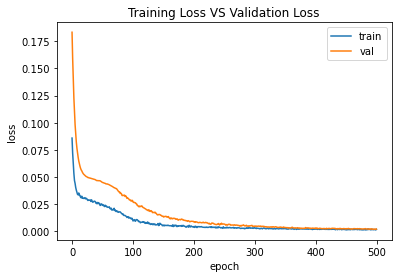

In [27]:
# Visualize loss

# Visualize training and validation loss.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss VS Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [35]:
# Generate list of sequence of days for predictions

n_future_step = 12
n_train_step = int(0.7 * 208)
n_val_step = int(0.15 * 208)
n_test_step = int(0.15 * 208)


datelist_train = pd.date_range(datelist_total[17], periods = n_train_step-18, freq='1m').tolist()
datelist_val = pd.date_range(datelist_total[n_train_step+17], periods=n_val_step-18, freq='1m').tolist()
datelist_test =pd.date_range(datelist_total[len(datelist_total)-n_test_step+17], periods=n_test_step-17, freq='1m').tolist()

datelist_future = pd.date_range(datelist_total[-1], periods=n_future_step, freq='1m').tolist()
# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
datelist_train_ = []
datelist_val_ = []
datelist_test_ = []

for this_timestamp in datelist_train:
    datelist_future_.append(this_timestamp.date())
for this_timestamp in datelist_val:
    datelist_train_.append(this_timestamp.date())
for this_timestamp in datelist_test:
    datelist_val_.append(this_timestamp.date())
for this_timestamp in datelist_future:
    datelist_test_.append(this_timestamp.date())


In [ ]:
#PREDICTIONS_TEST_SET['ShillerIndex']
len(datelist_train)
x_train.shape

(133, 17, 13)

In [31]:
# Perform predictions
predictions_future = model.predict(x_train[-12:])
train_set_prediction = model.predict(x_train) 
val_set_prediction = model.predict(x_val)
test_set_prediction = model.predict(x_test)

In [ ]:
#print(scaler_pred.inverse_transform(test_set_prediction))
#print(scaler_pred.inverse_transform(y_test))
#print(scaler_pred.inverse_transform(train_set_prediction))
#print(scaler_pred.inverse_transform(y_train))
x_train.shape

(128, 24, 13)

In [29]:
# Calculate RMSE
print('Test Set RMSE', math.sqrt(mean_squared_error(scaler_pred.inverse_transform(y_test),scaler_pred.inverse_transform(test_set_prediction))))
print('Validation Set RMSE',math.sqrt(mean_squared_error(scaler_pred.inverse_transform(y_val),scaler_pred.inverse_transform(val_set_prediction))))
print('Training Set RMSE', math.sqrt(mean_squared_error(scaler_pred.inverse_transform(y_train),scaler_pred.inverse_transform(train_set_prediction))))

Test Set RMSE 50.111735347358064
Validation Set RMSE 8.27225767662477
Training Set RMSE 5.003991468571698


In [33]:
# Parse training set timestamp for better visualization
df = pd.DataFrame(df, columns=features)
df.index = datelist_total
df.index = pd.to_datetime(df.index)

In [36]:
# Inversion and Tranformation

def datetime_to_timestamp(x):
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_train = scaler_pred.inverse_transform(train_set_prediction)
y_pred_valid = scaler_pred.inverse_transform(val_set_prediction)
y_pred_test = scaler_pred.inverse_transform(test_set_prediction)

y_pred_future = scaler_pred.inverse_transform(predictions_future)
#y_pred_train = scaler_pred.inverse_transform(predictions_train)


PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['ShillerIndex']).set_index(pd.Series(datelist_future))
PREDICTIONS_TRAIN_SET = pd.DataFrame(y_pred_train, columns=['ShillerIndex']).set_index(pd.Series(datelist_train))
PREDICTIONS_VAL_SET = pd.DataFrame(y_pred_valid, columns=['ShillerIndex']).set_index(pd.Series(datelist_val))
PREDICTIONS_TEST_SET = pd.DataFrame(y_pred_test, columns=['ShillerIndex']).set_index(pd.Series(datelist_test))


# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTIONS_TRAIN_SET.index = PREDICTIONS_TRAIN_SET.index.to_series().apply(datetime_to_timestamp)
PREDICTIONS_VAL_SET.index = PREDICTIONS_VAL_SET.index.to_series().apply(datetime_to_timestamp)
PREDICTIONS_TEST_SET.index = PREDICTIONS_TEST_SET.index.to_series().apply(datetime_to_timestamp)


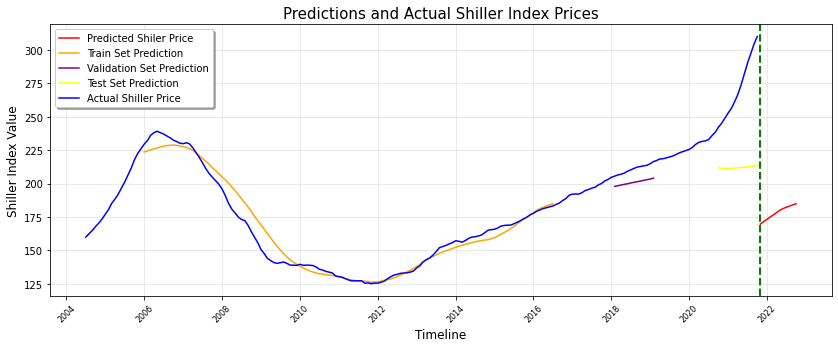

In [37]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE = '2004-01'
START_DATE_TRAIN = '2004-07-31'
START_DATE_VAL = '2016-08-31'
START_DATE_TEST = '2004-04-30'
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['ShillerIndex'], color='r', label='Predicted Shiler Price')
plt.plot(PREDICTIONS_TRAIN_SET.index, PREDICTIONS_TRAIN_SET['ShillerIndex'], color='orange', label='Train Set Prediction')
plt.plot(PREDICTIONS_VAL_SET.index, PREDICTIONS_VAL_SET['ShillerIndex'], color='purple', label='Validation Set Prediction')
plt.plot(PREDICTIONS_TEST_SET.index, PREDICTIONS_TEST_SET[START_DATE_TEST:]['ShillerIndex'], color='yellow', label='Test Set Prediction')
plt.plot(df.loc[START_DATE:].index, df.loc[START_DATE:]['ShillerIndex'], color='b', label='Actual Shiller Price')


plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predictions and Actual Shiller Index Prices', fontsize=15)
plt.xlabel('Timeline',fontsize=12)
plt.ylabel('Shiller Index Value', fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.show()